In [1]:
import pandas as pd
import sklearn 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.read_csv('Book3.csv')

In [3]:
data.head()

,Rhumidity,Temperature,WindSpeed,Solar Irradiance,PV Output
0,29.82,21.94,1.65,8.38,1.185
1,30.83,22.67,2.67,7.92,1.301
2,27.74,21.37,2.30,7.54,1.356
3,26.40,21.88,1.78,7.54,1.288
4,23.09,21.96,1.91,7.73,1.239


In [4]:
data.tail()

,Rhumidity,Temperature,WindSpeed,Solar Irradiance,PV Output
199,89.16,25.57,5.49,10.60,1.528
200,85.96,26.11,5.14,10.70,1.451
201,86.97,26.41,5.20,10.84,1.312
202,89.86,25.44,4.51,10.79,1.460
203,87.32,25.79,4.30,10.68,1.391


In [0]:
X = data.iloc[: , :-1]
Y = data.iloc[: , -1]

In [0]:
import seaborn as sns

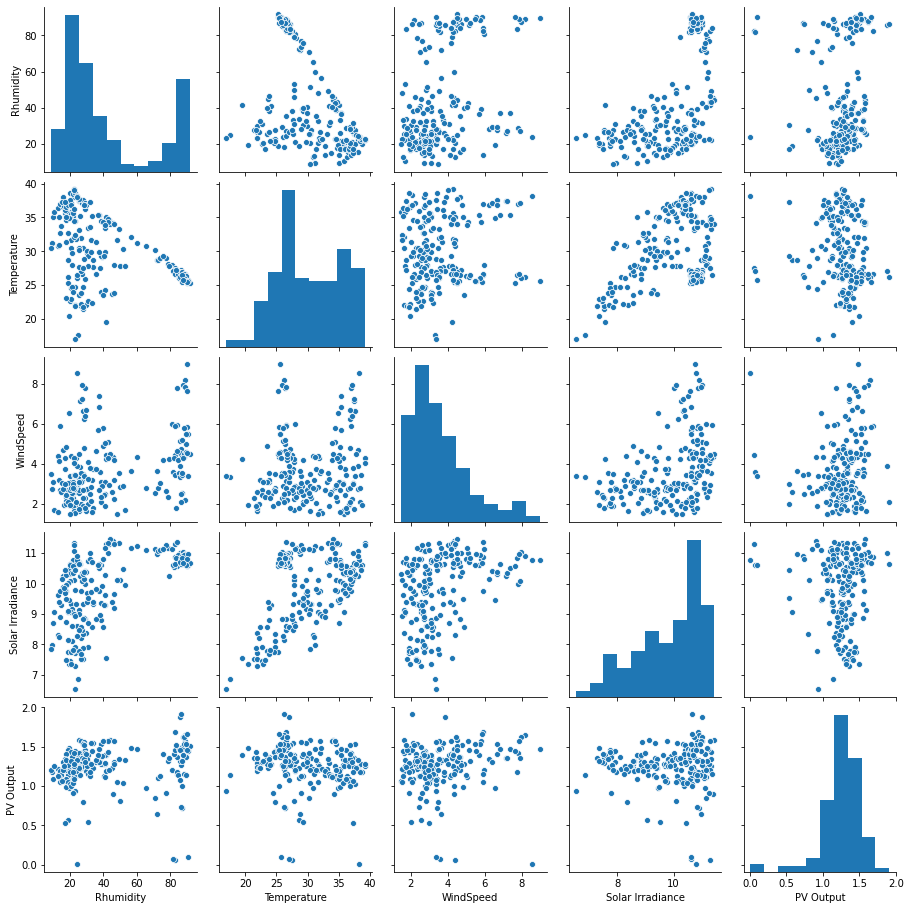

In [7]:
sns.pairplot(data)

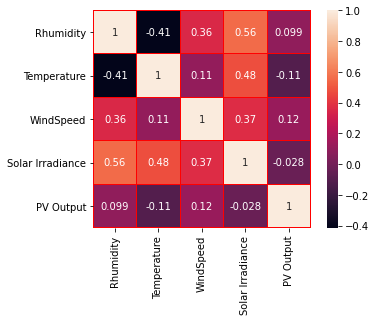

In [8]:
sns.heatmap(data.corr(),linewidth = 0.2, vmax=1.0, square=True, linecolor='red',annot=True)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [10]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = regressor.predict(X_test)

In [12]:
print(regressor.coef_)
print(regressor.intercept_)

[ 0.00074624 -0.00155811  0.01548595 -0.01210925]
1.3208651161460438


In [13]:
print('Train Score :', regressor.score(X_train,Y_train))
print('Test Score:', regressor.score(X_test,Y_test))

Train Score : 0.014799608123395758
Test Score: 0.07780546207339212


In [14]:
from sklearn import metrics

print('MSE :', metrics.mean_squared_error(Y_test,y_pred))

print('RMSE :', np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))


print('MAE :', metrics.mean_absolute_error(Y_test,y_pred))

MSE : 0.04130674509915254
RMSE : 0.2032406088830491
MAE : 0.15181507950821962


In [15]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              PV Output   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                              847.5
Date:                Tue, 05 May 2020   Prob (F-statistic):                   3.73e-124
Time:                        03:26:35   Log-Likelihood:                         -45.185
No. Observations:                 204   AIC:                                      98.37
Df Residuals:                     200   BIC:                                      111.6
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Rhumidity           -0.0083      0.003     -3.289      0.001      -0.013      -0.003
Temperature         -0.0374      0.013     -2.916      0.004      -0.063      -0.012
WindSpeed            0.0308      0.015      2.038      0.043       0.001       0.061
Solar Irradiance     0.2638      0.048      5.464      0.000       0.169       0.359
==============================================================================
Omnibus:                       87.835   Durbin-Watson:                   1.536
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              338.992
Skew:                          -1.725   Prob(JB):                     2.45e-74
Kurtosis:                       8.290   Cond. No.                         133.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
pred_y = model.predict(X_test)

<Figure size 576x432 with 0 Axes>

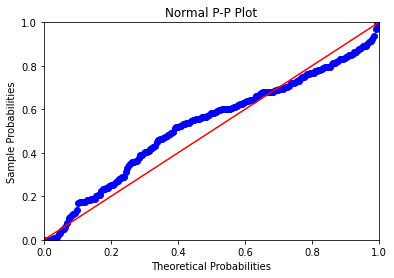

In [17]:
model_residual=model.resid
probplot=sm.ProbPlot(model_residual)
plt.figure(figsize=(8,6))
probplot.ppplot(line='45')
plt.title("Normal P-P Plot")
plt.show()

In [0]:
#residual plot for HOMOSCEDASTICITY
def get_std_val(vals):
    return (vals-vals.mean())/vals.std()

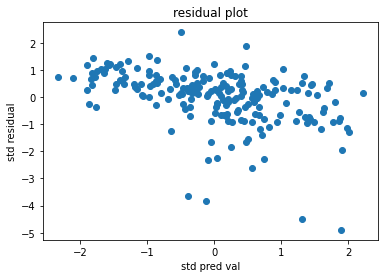

In [19]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.scatter(get_std_val(model.fittedvalues),get_std_val(model_residual))
plt.title("residual plot");
plt.xlabel("std pred val");
plt.ylabel("std residual");